<a href="https://colab.research.google.com/github/SarvinSaravi/two-satisfiability-optimization/blob/main/2Sat_graph_labeling_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import json

# Check satisfaction

In [ ]:
def satisfies(truth_assignment):

    if True in truth_assignment:
        return True

    return False

# The function of *SolveWithAssumptions*
Algorithm 2

In [ ]:
def solve_with_assumptions(G, A, T):

    Q = []
    C = []

    for v in A:
        Q.append(v)
        C.append(v)

    while Q:
        v = Q.pop(0)
        if not satisfies([T[v]]):
            for w in list(G.neighbors(v)):
                if (-w) in C:
                    return False
                elif not (w in C):
                    Q.append(w)
                    C.append(w)

    for v in C:
        T[v] = True
        T[-v] = False

    return True

# The function of *CheckSolvable*
Algorithm 1

In [ ]:
def check_solvable(G, C, T):
    satisfiable = False

    vi, vj = C

    if satisfies([T[vi], T[vj]]):
        satisfiable = True
    else:
        if vi == vj:
            if solve_with_assumptions(G, {vi}, T):
                satisfiable = True
        else:
            # vi != vj
            if solve_with_assumptions(G, {vi, vj}, T):
                satisfiable = True
            elif solve_with_assumptions(G, {-vi, vj}, T):
                satisfiable = True
            elif solve_with_assumptions(G, {vi, -vj}, T):
                satisfiable = True

    if satisfiable:
        edges = [(-vi, vj), (-vj, vi)]
        G.add_edges_from(edges)

    return satisfiable

# Implication Graph

In [ ]:
def construct_implication_graph(clauses):
    G = nx.DiGraph()
    for (u, v) in clauses:
        G.add_edge(-u, v)
        G.add_edge(-v, u)
    return G

# Example usage in dictionary
# clauses = [(1, -2), (-1, 3), (2, -3)]
# G = construct_implication_graph(clauses)
# G = nx.to_dict_of_dicts(G)
# print(json.dumps(G, sort_keys=True, indent=4))

# Example usage in plot
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrowsize=20)
# plt.show()


# Final *executive* block

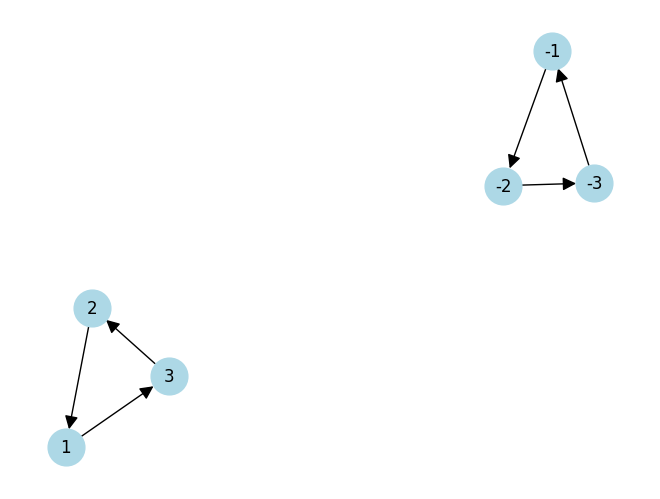

Satisfiable: {1: True, 2: True, 3: True, -1: False, -2: False, -3: False}


In [ ]:
clauses = [(1, -2), (-1, 3), (2, -3)]
T_set = [True, True, True]

T_dict = {i + 1: T_set[i] for i in range(len(T_set))}
T_dict.update({-(i + 1): not T_set[i] for i in range(len(T_set))})
I_graph = construct_implication_graph(clauses)

sat = []

for clause in clauses:
     sat = check_solvable(I_graph, clause, T_dict)

# show the implication graph in dictionary form
# G = nx.to_dict_of_dicts(I_graph)
# print(json.dumps(G, sort_keys=True, indent=4))

pos = nx.spring_layout(I_graph)
nx.draw(I_graph, pos, with_labels=True, node_size=700, node_color='lightblue', arrowsize=20)
plt.show()

if sat:
    print("Satisfiable:", T_dict)
else:
    print("Unsatisfiable")

